In [108]:
import json
import pandas as pd
import numpy as np # linear algebra
import os
import re
import emoji
import string
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_jsonl(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data

In [3]:
# webpage_data = load_jsonl('data/trainingData/coronavirus-tweet-id-2020-06-01-00.jsonl')
# db_data = []
# db_cols = ['created_at', 'full_text', 'lang']
# for d in webpage_data:
#     db_data.append([])
#     for col in db_cols:
#         db_data[-1].append(d.get(col, float('nan')))
 
# df = pd.DataFrame(db_data, columns=db_cols)

df = pd.read_json(''data/trainingData/'coronavirus-tweet-id-2020-06-01-00.jsonl', lines=True)

## EDA

In [5]:
df = df[['created_at', 'full_text', 'lang' ]]
df.head()

,created_at,full_text,lang
0,2020-06-01 00:00:00+00:00,RT @LissomeLight: Oh my god these people reall...,en
1,2020-06-01 00:00:00+00:00,"RT @costareports: To some of the senators, Tru...",en
2,2020-06-01 00:00:00+00:00,RT @AngrierWHStaff: The venn diagram of the pe...,en
3,2020-06-01 00:00:00+00:00,RT @ArashKolahi: This country was infinity mor...,en
4,2020-06-01 00:00:00+00:00,I SCREAMED 😂😂 https://t.co/CuIPpcFTTr,en


In [6]:
df.describe()

,created_at,full_text,lang
count,36614,36614,36614
unique,837,16924,47
top,2020-06-01 00:00:00+00:00,RT @HelpfulKraken: They can't give you money t...,en
freq,72,1663,25334
first,2020-06-01 00:00:00+00:00,NaN,NaN
last,2020-06-01 00:49:04+00:00,NaN,NaN


In [7]:
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [8]:
missing_value_of_data(df)

,Total,Percentage
lang,0,0.0
full_text,0,0.0
created_at,0,0.0


In [9]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [10]:
count_values_in_column(df,'full_text')

,Total,Percentage
"RT @HelpfulKraken: They can't give you money to survive a pandemic, they can't find schools, they can't fix water pipes but they can buy ev…",1663,4.54
RT @LEXartistes: Attending protests is not for everyone and that's ok. Whether you are continuing to quarantine in mid-pandemic or you simp…,816,2.23
RT @kissychalamets: la is closing covid-19 testing centers to punish protesters..... they're weaponizing this pandemic in an attempt to sil…,566,1.55
RT @brs2167: She got a walker. Can barely raise her voice. In the hot sun. AT 74. In the middle of a pandemic that threatens her more than…,520,1.42
RT @trythefish: Huntington Beach 2 weeks ago: Protest against stay-at-home order and to open the beaches on the left.…,457,1.25
...,...,...
Coronavirus Crisis Staff Of Electricity Department Are Working Non Stop TATA POWER Dedicates Poem https://t.co/aZgqbL5t1a,1,0.00
@MayorJenny Like you did when you ordered them on lockdown with no notice while all the exits were blocked? Then ordered the assault on groups of peaceful protestors. Look at yourself.,1,0.00
"@PoliBites @shuddupplease Im not supporting burning down places specially small businesses and homes, If it was on huge companies like target would be wayyy different as they are billionaire companies and many different jobs are opening because of covid-19",1,0.00
5160//...|PREMEDIT@TE(11)/D(12)/ MURDER(6)// (19)/...COVID (5)// (25)/...|BBC News - George Floyd death: Lawyer calls it 'premeditated murder'\nhttps://t.co/RKyC2ZcGNO,1,0.00


In [11]:
def unique_values_in_column(data,feature):
    unique_val=pd.Series(data.loc[:,feature].unique())
    return pd.concat([unique_val],axis=1,keys=['Unique Values'])

In [12]:
unique_values_in_column(df,'full_text')

,Unique Values
0,RT @LissomeLight: Oh my god these people reall...
1,"RT @costareports: To some of the senators, Tru..."
2,RT @AngrierWHStaff: The venn diagram of the pe...
3,RT @ArashKolahi: This country was infinity mor...
4,I SCREAMED 😂😂 https://t.co/CuIPpcFTTr
...,...
16919,“The lesson from this disaster is that the leg...
16920,RT @Debora_D_Diniz: Ministra Damares faz chaco...
16921,interesting how just last week we were calling...
16922,"Por um momento geral esqueceu do covid, fogo n..."


In [13]:
def duplicated_values_data(data):
    dup=[]
    columns=data.columns
    for i in data.columns:
        dup.append(sum(data[i].duplicated()))
    return pd.concat([pd.Series(columns),pd.Series(dup)],axis=1,keys=['Columns','Duplicate count'])

In [14]:
duplicated_values_data(df)

,Columns,Duplicate count
0,created_at,35777
1,full_text,19690
2,lang,36567


## URL 

In [15]:
 def find_url(string): 
    text = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',string)
    return "".join(text) # converting return value from list to string

In [16]:
df['url']=df['full_text'].apply(lambda x:find_url(x))

In [17]:
df.head()

,created_at,full_text,lang,url
0,2020-06-01 00:00:00+00:00,RT @LissomeLight: Oh my god these people reall...,en,
1,2020-06-01 00:00:00+00:00,"RT @costareports: To some of the senators, Tru...",en,
2,2020-06-01 00:00:00+00:00,RT @AngrierWHStaff: The venn diagram of the pe...,en,
3,2020-06-01 00:00:00+00:00,RT @ArashKolahi: This country was infinity mor...,en,
4,2020-06-01 00:00:00+00:00,I SCREAMED 😂😂 https://t.co/CuIPpcFTTr,en,https://t.co/CuIPpcFTTr


## Emoticon

In [18]:
def find_emoji(text):
    emo_text=emoji.demojize(text)
    line=re.findall(r'\:(.*?)\:',emo_text)
    return line

In [19]:
df['emoji']=df['full_text'].apply(lambda x: find_emoji(x))

In [20]:
df.head()

,created_at,full_text,lang,url,emoji
0,2020-06-01 00:00:00+00:00,RT @LissomeLight: Oh my god these people reall...,en,,[]
1,2020-06-01 00:00:00+00:00,"RT @costareports: To some of the senators, Tru...",en,,[]
2,2020-06-01 00:00:00+00:00,RT @AngrierWHStaff: The venn diagram of the pe...,en,,[]
3,2020-06-01 00:00:00+00:00,RT @ArashKolahi: This country was infinity mor...,en,,[]
4,2020-06-01 00:00:00+00:00,I SCREAMED 😂😂 https://t.co/CuIPpcFTTr,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]"


In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [22]:
df['full_text']=df['full_text'].apply(lambda x: remove_emoji(x))

## Email

In [23]:
def find_email(text):
    line = re.findall(r'[\w\.-]+@[\w\.-]+',str(text))
    return ",".join(line)

In [24]:
df['email']=df['full_text'].apply(lambda x: find_email(x))

In [25]:
df.head()

,created_at,full_text,lang,url,emoji,email
0,2020-06-01 00:00:00+00:00,RT @LissomeLight: Oh my god these people reall...,en,,[],
1,2020-06-01 00:00:00+00:00,"RT @costareports: To some of the senators, Tru...",en,,[],
2,2020-06-01 00:00:00+00:00,RT @AngrierWHStaff: The venn diagram of the pe...,en,,[],
3,2020-06-01 00:00:00+00:00,RT @ArashKolahi: This country was infinity mor...,en,,[],
4,2020-06-01 00:00:00+00:00,I SCREAMED https://t.co/CuIPpcFTTr,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",


## Hashtags

In [26]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)

In [27]:
df['hash']=df['full_text'].apply(lambda x: find_hash(x))
df.head()

,created_at,full_text,lang,url,emoji,email,hash
0,2020-06-01 00:00:00+00:00,RT @LissomeLight: Oh my god these people reall...,en,,[],,
1,2020-06-01 00:00:00+00:00,"RT @costareports: To some of the senators, Tru...",en,,[],,
2,2020-06-01 00:00:00+00:00,RT @AngrierWHStaff: The venn diagram of the pe...,en,,[],,
3,2020-06-01 00:00:00+00:00,RT @ArashKolahi: This country was infinity mor...,en,,[],,
4,2020-06-01 00:00:00+00:00,I SCREAMED https://t.co/CuIPpcFTTr,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,


## Mentions

In [28]:
def find_at(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)

In [29]:
df['at_mention']=df['full_text'].apply(lambda x: find_at(x))

In [30]:
df.head()

,created_at,full_text,lang,url,emoji,email,hash,at_mention
0,2020-06-01 00:00:00+00:00,RT @LissomeLight: Oh my god these people reall...,en,,[],,,LissomeLight
1,2020-06-01 00:00:00+00:00,"RT @costareports: To some of the senators, Tru...",en,,[],,,costareports
2,2020-06-01 00:00:00+00:00,RT @AngrierWHStaff: The venn diagram of the pe...,en,,[],,,AngrierWHStaff
3,2020-06-01 00:00:00+00:00,RT @ArashKolahi: This country was infinity mor...,en,,[],,,ArashKolahi
4,2020-06-01 00:00:00+00:00,I SCREAMED https://t.co/CuIPpcFTTr,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,


## Cleaning the corpus

In [31]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'(?<=@)\w+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [32]:
df['full_text'] = df['full_text'].apply(lambda x:clean_text(x))

In [33]:
df.head()

,created_at,full_text,lang,url,emoji,email,hash,at_mention
0,2020-06-01 00:00:00+00:00,rt oh my god these people really went from “m...,en,,[],,,LissomeLight
1,2020-06-01 00:00:00+00:00,rt to some of the senators trump seemed obses...,en,,[],,,costareports
2,2020-06-01 00:00:00+00:00,rt the venn diagram of the people saying “jus...,en,,[],,,AngrierWHStaff
3,2020-06-01 00:00:00+00:00,rt this country was infinity more prepared to...,en,,[],,,ArashKolahi
4,2020-06-01 00:00:00+00:00,i screamed,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,


In [34]:
df['full_text'] = df['full_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [35]:
df.head()

,created_at,full_text,lang,url,emoji,email,hash,at_mention
0,2020-06-01 00:00:00+00:00,these people really went from “making stay hom...,en,,[],,,LissomeLight
1,2020-06-01 00:00:00+00:00,some senators trump seemed obsessed with savin...,en,,[],,,costareports
2,2020-06-01 00:00:00+00:00,venn diagram people saying “just comply with p...,en,,[],,,AngrierWHStaff
3,2020-06-01 00:00:00+00:00,this country infinity more prepared against pe...,en,,[],,,ArashKolahi
4,2020-06-01 00:00:00+00:00,screamed,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,


## tokenization

In [36]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['full_text'].apply(lambda x: tokenization(x.lower()))
df.head()

,created_at,full_text,lang,url,emoji,email,hash,at_mention,tokenized
0,2020-06-01 00:00:00+00:00,these people really went from “making stay hom...,en,,[],,,LissomeLight,"[these, people, really, went, from, making, st..."
1,2020-06-01 00:00:00+00:00,some senators trump seemed obsessed with savin...,en,,[],,,costareports,"[some, senators, trump, seemed, obsessed, with..."
2,2020-06-01 00:00:00+00:00,venn diagram people saying “just comply with p...,en,,[],,,AngrierWHStaff,"[venn, diagram, people, saying, just, comply, ..."
3,2020-06-01 00:00:00+00:00,this country infinity more prepared against pe...,en,,[],,,ArashKolahi,"[this, country, infinity, more, prepared, agai..."
4,2020-06-01 00:00:00+00:00,screamed,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,,[screamed]


## remove stop words

In [37]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srjhanwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['stopwords_removed'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,created_at,full_text,lang,url,emoji,email,hash,at_mention,tokenized,stopwords_removed
0,2020-06-01 00:00:00+00:00,these people really went from “making stay hom...,en,,[],,,LissomeLight,"[these, people, really, went, from, making, st...","[people, really, went, making, stay, home, tyr..."
1,2020-06-01 00:00:00+00:00,some senators trump seemed obsessed with savin...,en,,[],,,costareports,"[some, senators, trump, seemed, obsessed, with...","[senators, trump, seemed, obsessed, saving, li..."
2,2020-06-01 00:00:00+00:00,venn diagram people saying “just comply with p...,en,,[],,,AngrierWHStaff,"[venn, diagram, people, saying, just, comply, ...","[venn, diagram, people, saying, comply, police..."
3,2020-06-01 00:00:00+00:00,this country infinity more prepared against pe...,en,,[],,,ArashKolahi,"[this, country, infinity, more, prepared, agai...","[country, infinity, prepared, people, defend, ..."
4,2020-06-01 00:00:00+00:00,screamed,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,,[screamed],[screamed]
5,2020-06-01 00:00:00+00:00,continua envergonhando história diplomacia bra...,pt,https://t.co/2LdPbIpwMs,[],,,,"[continua, envergonhando, história, diplomacia...","[continua, envergonhando, história, diplomacia..."
6,2020-06-01 00:00:00+00:00,icymi clintons have killed more than coronavirus,en,https://t.co/00dDDRIs4o,[],,,blaze0497,"[icymi, clintons, have, killed, more, than, co...","[icymi, clintons, killed, coronavirus]"
7,2020-06-01 00:00:00+00:00,they cant give money survive pandemic they can...,en,,[],,,HelpfulKraken,"[they, cant, give, money, survive, pandemic, t...","[cant, give, money, survive, pandemic, cant, f..."
8,2020-06-01 00:00:00+00:00,unique like purple within purple state watch w...,en,,[],,,KcNightfire,"[unique, like, purple, within, purple, state, ...","[unique, like, purple, within, purple, state, ..."
9,2020-06-01 00:00:00+00:00,covid socialdistancing rulesdon’t stand close ...,en,,[],,,RichLowry,"[covid, socialdistancing, rulesdon, t, stand, ...","[covid, socialdistancing, rulesdon, stand, clo..."


## Stemming and Lemmatization

In [39]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed'] = df['stopwords_removed'].apply(lambda x: stemming(x))
df.head()

,created_at,full_text,lang,url,emoji,email,hash,at_mention,tokenized,stopwords_removed,stemmed
0,2020-06-01 00:00:00+00:00,these people really went from “making stay hom...,en,,[],,,LissomeLight,"[these, people, really, went, from, making, st...","[people, really, went, making, stay, home, tyr...","[peopl, realli, went, make, stay, home, tyrann..."
1,2020-06-01 00:00:00+00:00,some senators trump seemed obsessed with savin...,en,,[],,,costareports,"[some, senators, trump, seemed, obsessed, with...","[senators, trump, seemed, obsessed, saving, li...","[senat, trump, seem, obsess, save, live, appea..."
2,2020-06-01 00:00:00+00:00,venn diagram people saying “just comply with p...,en,,[],,,AngrierWHStaff,"[venn, diagram, people, saying, just, comply, ...","[venn, diagram, people, saying, comply, police...","[venn, diagram, peopl, say, compli, polic, sta..."
3,2020-06-01 00:00:00+00:00,this country infinity more prepared against pe...,en,,[],,,ArashKolahi,"[this, country, infinity, more, prepared, agai...","[country, infinity, prepared, people, defend, ...","[countri, infin, prepar, peopl, defend, peopl,..."
4,2020-06-01 00:00:00+00:00,screamed,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,,[screamed],[screamed],[scream]


In [40]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['stemmed'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srjhanwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,created_at,full_text,lang,url,emoji,email,hash,at_mention,tokenized,stopwords_removed,stemmed,lemmatized
0,2020-06-01 00:00:00+00:00,these people really went from “making stay hom...,en,,[],,,LissomeLight,"[these, people, really, went, from, making, st...","[people, really, went, making, stay, home, tyr...","[peopl, realli, went, make, stay, home, tyrann...","[peopl, realli, went, make, stay, home, tyrann..."
1,2020-06-01 00:00:00+00:00,some senators trump seemed obsessed with savin...,en,,[],,,costareports,"[some, senators, trump, seemed, obsessed, with...","[senators, trump, seemed, obsessed, saving, li...","[senat, trump, seem, obsess, save, live, appea...","[senat, trump, seem, ob, save, live, appear, p..."
2,2020-06-01 00:00:00+00:00,venn diagram people saying “just comply with p...,en,,[],,,AngrierWHStaff,"[venn, diagram, people, saying, just, comply, ...","[venn, diagram, people, saying, comply, police...","[venn, diagram, peopl, say, compli, polic, sta...","[venn, diagram, peopl, say, compli, polic, sta..."
3,2020-06-01 00:00:00+00:00,this country infinity more prepared against pe...,en,,[],,,ArashKolahi,"[this, country, infinity, more, prepared, agai...","[country, infinity, prepared, people, defend, ...","[countri, infin, prepar, peopl, defend, peopl,...","[countri, infin, prepar, peopl, defend, peopl,..."
4,2020-06-01 00:00:00+00:00,screamed,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,,[screamed],[screamed],[scream],[scream]


## Polarity assignment

In [88]:
analyser = SIA()

In [89]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [90]:
sentiment = df['full_text'].apply(lambda x: analyser.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)

In [91]:
df.head()

,created_at,full_text,lang,url,emoji,email,hash,at_mention,tokenized,stopwords_removed,stemmed,lemmatized,neg,neu,pos,compound
0,2020-06-01 00:00:00+00:00,these people really went from “making stay hom...,en,,[],,,LissomeLight,"[these, people, really, went, from, making, st...","[people, really, went, making, stay, home, tyr...","[peopl, realli, went, make, stay, home, tyrann...","[peopl, realli, went, make, stay, home, tyrann...",0.000,1.000,0.000,0.0000
1,2020-06-01 00:00:00+00:00,some senators trump seemed obsessed with savin...,en,,[],,,costareports,"[some, senators, trump, seemed, obsessed, with...","[senators, trump, seemed, obsessed, saving, li...","[senat, trump, seem, obsess, save, live, appea...","[senat, trump, seem, ob, save, live, appear, p...",0.106,0.688,0.206,0.3818
2,2020-06-01 00:00:00+00:00,venn diagram people saying “just comply with p...,en,,[],,,AngrierWHStaff,"[venn, diagram, people, saying, just, comply, ...","[venn, diagram, people, saying, comply, police...","[venn, diagram, peopl, say, compli, polic, sta...","[venn, diagram, peopl, say, compli, polic, sta...",0.000,1.000,0.000,0.0000
3,2020-06-01 00:00:00+00:00,this country infinity more prepared against pe...,en,,[],,,ArashKolahi,"[this, country, infinity, more, prepared, agai...","[country, infinity, prepared, people, defend, ...","[countri, infin, prepar, peopl, defend, peopl,...","[countri, infin, prepar, peopl, defend, peopl,...",0.000,0.834,0.166,0.2944
4,2020-06-01 00:00:00+00:00,screamed,en,https://t.co/CuIPpcFTTr,"[face_with_tears_of_joy, face_with_tears_of_joy]",,,,[screamed],[screamed],[scream],[scream],1.000,0.000,0.000,-0.3182


In [105]:
df.index = pd.to_datetime(df['created_at'])
df['mean'] = df['compound'].expanding().mean()
df['rolling'] = df['compound'].rolling('1min').mean()

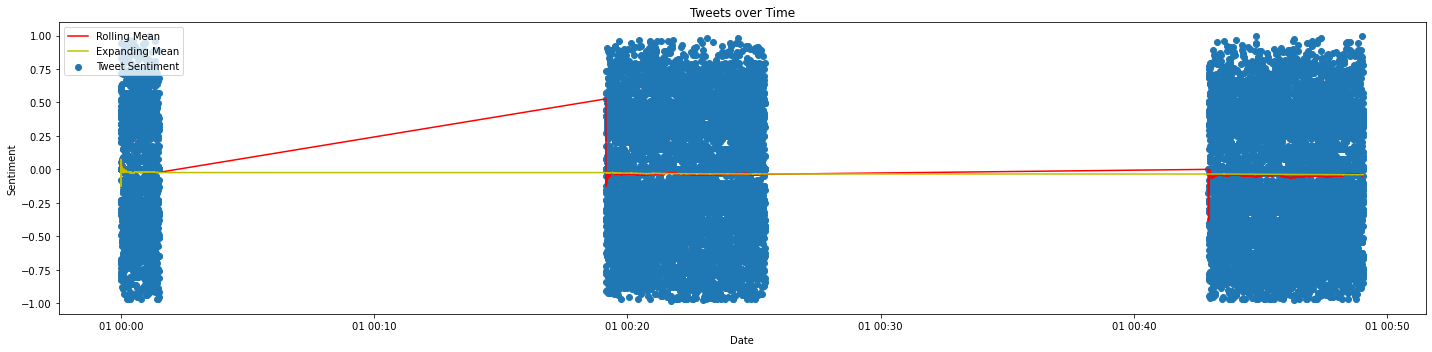

In [106]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['created_at'],df['compound'], label='Tweet Sentiment')
ax.plot(df['created_at'],df['rolling'], color ='r', label='Rolling Mean')
ax.plot(df['created_at'],df['mean'], color='y', label='Expanding Mean')
ax.set(title='Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

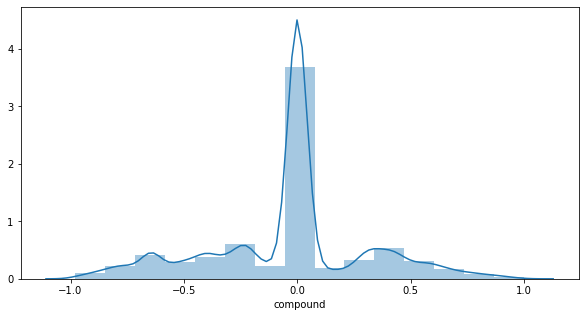

In [109]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df['compound'], bins=15, ax=ax)
plt.show()

In [111]:
def to_sentiment(rating):
  if rating >= 0.05 :
    return 'positive'
  elif rating <= -0.05:
    return 'negative'
  else:
    return 'neutral'
df['sentiment'] = df['compound'].apply(to_sentiment)
class_names = ['negative', 'neutral', 'positive']

In [112]:
df.head()

,created_at,full_text,lang,url,emoji,email,hash,at_mention,tokenized,stopwords_removed,stemmed,lemmatized,neg,neu,pos,compound,mean,rolling,sentiment
created_at,,,,,,,,,,,,,,,,,,,
2020-06-01 00:00:00+00:00,2020-06-01 00:00:00+00:00,these people really went from “making stay hom...,en,,[],,,LissomeLight,"[these, people, really, went, from, making, st...","[people, really, went, making, stay, home, tyr...","[peopl, realli, went, make, stay, home, tyrann...","[peopl, realli, went, make, stay, home, tyrann...",0.000,1.000,0.000,0.000,0.000000,0.000000,neutral
2020-06-01 00:00:00+00:00,2020-06-01 00:00:00+00:00,permiso para circular obligatorio todo territo...,es,https://t.co/BBnqbJ1nxhhttps://t.co/oeqHSi14D0,[//t.co/BBnqbJ1nxh https],,CuidAR Coronavirus COVID19 PermisoDeCirculación,,"[permiso, para, circular, obligatorio, todo, t...","[permiso, para, circular, obligatorio, todo, t...","[permiso, para, circular, obligatorio, todo, t...","[permiso, para, circular, obligatorio, todo, t...",0.000,1.000,0.000,0.000,0.000000,0.000000,neutral
2020-06-01 00:00:00+00:00,2020-06-01 00:00:00+00:00,obama speech former president criticizes leade...,en,https://t.co/XDFmDlTH9F,[],,,,"[obama, speech, former, president, criticizes,...","[obama, speech, former, president, criticizes,...","[obama, speech, former, presid, critic, leader...","[obama, speech, former, presid, critic, leader...",0.167,0.833,0.000,-0.340,-0.113333,-0.113333,negative
2020-06-01 00:00:00+00:00,2020-06-01 00:00:00+00:00,coronavirus datos mapas gráficos evolución cas...,es,https://t.co/QYIGkQ2flJhttps://t.co/WvcYdkpGTc,[ mapas y gráficos de la evolución de los caso...,,,,"[coronavirus, datos, mapas, gráficos, evolució...","[coronavirus, datos, mapas, gráficos, evolució...","[coronaviru, dato, mapa, gráfico, evolución, c...","[coronaviru, dato, mapa, gráfico, evolución, c...",0.000,1.000,0.000,0.000,-0.085000,-0.085000,neutral
2020-06-01 00:00:00+00:00,2020-06-01 00:00:00+00:00,these poor peoplethese business owners sacrifi...,en,,[],,,Techno_Fog,"[these, poor, peoplethese, business, owners, s...","[poor, peoplethese, business, owners, sacrific...","[poor, peoplethes, busi, owner, sacrif, liveli...","[poor, peoplethes, busi, owner, sacrif, liveli...",0.194,0.688,0.119,-0.296,-0.127200,-0.127200,negative
